In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [3]:
np.random.seed(6)
population_ages_1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages_2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages_1,population_ages_2))

minnesota_ages_1=stats.poisson.rvs(loc=18,mu=30,size=30)
minnesota_ages_2=stats.poisson.rvs(loc=18,mu=10,size=20)
minnesota_ages=np.concatenate((minnesota_ages_1,minnesota_ages_1))

print(population_ages.mean())
print(minnesota_ages.mean())

43.000112
46.5


In [4]:
stats.ttest_1samp(a=minnesota_ages,             #Sample data
                 popmean=population_ages.mean())#Population mean 

Ttest_1sampResult(statistic=4.719248016473501, pvalue=1.4981471956837838e-05)

In [5]:
stats.t.ppf(q=0.025, #Quantile to check
           df=49)    #Degrees of freedom

-2.0095752344892093

In [6]:
stats.t.ppf(q=0.975, #Quantile to check
           df=49)    #Degrees of freedom

2.009575234489209

In [7]:
stats.t.cdf(x=-2.5742, #T-test statistic
           df=49)*2    #Multiply by 2 for two tailed test

0.013121066545690117

In [8]:
sigma=minnesota_ages.std()/math.sqrt(50)  #Sample stdev/sample size
stats.t.interval(0.95,                    #Confidence level
                df=49,                    #Degrees of freedom
                loc=minnesota_ages.mean(),#Sample mean
                scale=sigma)              #Standard deviation estimate

(44.881075414859, 48.118924585141)

In [9]:
stats.t.interval(0.99,                    #Confidence level
                df=49,                    #Degrees of freedom
                loc=minnesota_ages.mean(),#Sample mean
                scale=sigma)              #Standard deviation estimate

(44.341016318947595, 48.658983681052405)

TWO SAMPLE T-TEST

In [10]:
np.random.seed(12)
wisconsin_ages_1=stats.poisson.rvs(loc=18,mu=33,size=30)
wisconsin_ages_2=stats.poisson.rvs(loc=18,mu=13,size=200)
wisconsin_ages=np.concatenate((wisconsin_ages_1,wisconsin_ages_2))
print(wisconsin_ages.mean())

33.22608695652174


In [11]:
stats.ttest_ind(a=minnesota_ages,  #ind=independence
               b=wisconsin_ages,
               equal_var=False)    #Assume sample have equal variance

Ttest_indResult(statistic=14.846546041530093, pvalue=8.462824796081591e-29)

PAIRED T-TEST 

In [13]:
np.random.seed(11)
before=stats.norm.rvs(scale=30,loc=250,size=100)
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100)
weight_df=pd.DataFrame({"weight_before":before,
                       "weight_after":after,
                       "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [14]:
stats.ttest_rel(a=before,
               b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

TYPE I AND TYPE II ERROR

Text(0, 0.02, 'Type II Error')

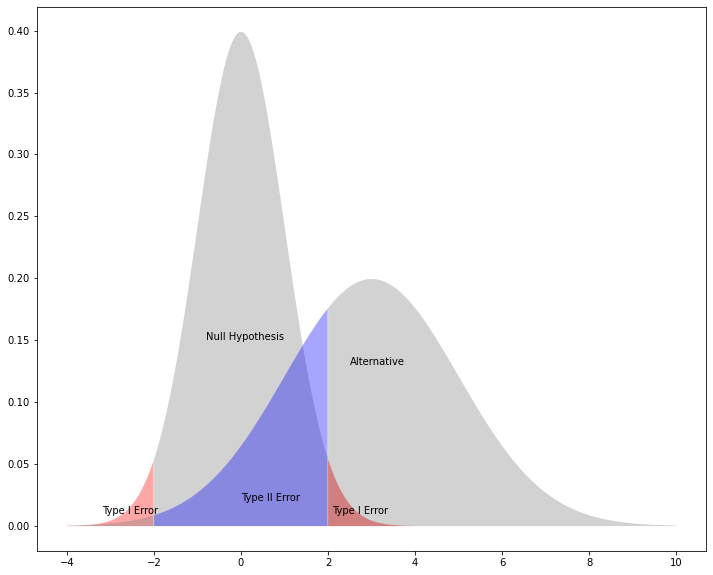

In [17]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01),
                y1=stats.norm.pdf(np.arange(-4,-2,0.01)),
                facecolor="red",
                alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),
                y1=stats.norm.pdf(np.arange(-2,2,0.01)),
                facecolor="grey",
                alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01),
                y1=stats.norm.pdf(np.arange(2,4,0.01)),
                facecolor="red",
                alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01),
                y1=stats.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),
                facecolor="grey",
                alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),
                y1=stats.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),
                facecolor="blue",
                alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01),
                y1=stats.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),
                facecolor="grey",
                alpha=0.35)

plt.text(x=-0.8,y=0.15,s="Null Hypothesis")
plt.text(x=2.5,y=0.13,s="Alternative")
plt.text(x=2.1,y=0.01,s="Type I Error")
plt.text(x=-3.2,y=0.01,s="Type I Error")
plt.text(x=0,y=0.02,s="Type II Error")